**Importiere die notwendigen Packages**

In [1]:
import pandas as pd
import pivottablejs
from pivottablejs import pivot_ui
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
from datetime import datetime
import geopandas as gpd
import folium 



Definiere Settings. Hier das Zahlenformat von Float-Werten (z.B. *'{:,.2f}'.format* mit Komma als Tausenderzeichen), 

In [2]:
pd.options.display.float_format = '{:.0f}'.format
pd.set_option('display.width', 100)
pd.set_option('display.max_columns', 15)

Importiere einen Datensatz von der **DWH_INT** Dropzone.

- Beachte dabei die Notation des Pfades...
- Definiere mal aktuell noch keine weiteren Parameter beim Import

**Dataset auf INTEG Datenkatalog**: https://data.integ.stadt-zuerich.ch/dataset/int_dwh_bev_bestand_jahr_medianalter_od4712

(int_dwh)

In [3]:
# Filepath
fp = r"//szh.loc/ssz/applikationen/OGD_Dropzone/INT_DWH/bev_bestand_jahr_medianalter_OD4712/BEV471OD4712.csv"

# Read the data
data2betested = pd.read_csv(
    fp, 
    sep=',',
   #usecols=[0,1,2,3,4,6],
   #names=['stationid','year','month','avgtemp','latitude','longitude','elevation','station','countryid','country'],
   #skiprows=1,
   # parse_dates=[0],
    parse_dates=True,
    #date_parser=lambda x: pd.to_datetime(x, format="%Y"), 
    #index_col="date_time",
    low_memory=False    
    )

In der Folge ein paar erste Tests:

In [4]:
type(data2betested)

pandas.core.frame.DataFrame

 - 1) Zeige eine kurze Vorschau der importierten Daten
 - 2) Weise die Datentypen aus
 - 3) Zeige die Shape (Umfang) des Datensatzes an

In [5]:
data2betested.head(3)

,StichtagDatJahr,KategorieLang,RaumSort,RaumLang,Medianalter
0,1993,Ganze Stadt,0,Ganze Stadt,40
1,1994,Ganze Stadt,0,Ganze Stadt,40
2,1995,Ganze Stadt,0,Ganze Stadt,40


In [6]:
data2betested.dtypes

StichtagDatJahr      int64
KategorieLang       object
RaumSort             int64
RaumLang            object
Medianalter        float64
dtype: object

In [7]:
data2betested.shape

(1316, 5)

Beschreibe einzelne Attribute

In [8]:
data2betested.describe()

,StichtagDatJahr,RaumSort,Medianalter
count,1316,1316,1316
mean,2006,49,39
std,8,40,3
min,1993,0,33
25%,2000,11,36
50%,2006,41,39
75%,2013,82,41
max,2020,123,49


Wie viele Nullwerte gibt es im Datensatz?

In [9]:
data2betested.isnull().sum()

StichtagDatJahr    0
KategorieLang      0
RaumSort           0
RaumLang           0
Medianalter        0
dtype: int64

Wandle die Spalte Jahr von Int zu **Datetime** um. Dies wird in den meisten Grafiken so benötigt.

In [10]:
data2betested['StichtagDatJahr']=pd.to_datetime(data2betested['StichtagDatJahr'], format='%Y')

#TO DO --> setze das Datum auf den 31.12. der Jahres.
#test=data2betested[['StichtagDatJahr']].date().replace(month=12, day=31)

data2betested

,StichtagDatJahr,KategorieLang,RaumSort,RaumLang,Medianalter
0,1993-01-01,Ganze Stadt,0,Ganze Stadt,40
1,1994-01-01,Ganze Stadt,0,Ganze Stadt,40
2,1995-01-01,Ganze Stadt,0,Ganze Stadt,40
3,1996-01-01,Ganze Stadt,0,Ganze Stadt,39
4,1997-01-01,Ganze Stadt,0,Ganze Stadt,39
...,...,...,...,...,...
1311,2016-01-01,Stadtquartier,123,Hirzenbach,36
1312,2017-01-01,Stadtquartier,123,Hirzenbach,36
1313,2018-01-01,Stadtquartier,123,Hirzenbach,36
1314,2019-01-01,Stadtquartier,123,Hirzenbach,36


Bereite die Daten für die Grafik unten vor

In [11]:
Jahre = data2betested.groupby("StichtagDatJahr")
len(Jahre)

28

In [12]:
for key, group in Jahre:
    print(key, len(group))

1993-01-01 00:00:00 47
1994-01-01 00:00:00 47
1995-01-01 00:00:00 47
1996-01-01 00:00:00 47
1997-01-01 00:00:00 47
1998-01-01 00:00:00 47
1999-01-01 00:00:00 47
2000-01-01 00:00:00 47
2001-01-01 00:00:00 47
2002-01-01 00:00:00 47
2003-01-01 00:00:00 47
2004-01-01 00:00:00 47
2005-01-01 00:00:00 47
2006-01-01 00:00:00 47
2007-01-01 00:00:00 47
2008-01-01 00:00:00 47
2009-01-01 00:00:00 47
2010-01-01 00:00:00 47
2011-01-01 00:00:00 47
2012-01-01 00:00:00 47
2013-01-01 00:00:00 47
2014-01-01 00:00:00 47
2015-01-01 00:00:00 47
2016-01-01 00:00:00 47
2017-01-01 00:00:00 47
2018-01-01 00:00:00 47
2019-01-01 00:00:00 47
2020-01-01 00:00:00 47


In [13]:
myJahr = "2020-01-01"
aktuellesJahr=Jahre.get_group(myJahr)   
aktuellesJahr.head(3)

,StichtagDatJahr,KategorieLang,RaumSort,RaumLang,Medianalter
27,2020-01-01,Ganze Stadt,0,Ganze Stadt,38
55,2020-01-01,Stadtkreis,1,Kreis 1,41
83,2020-01-01,Stadtkreis,2,Kreis 2,38


**Selektionen und Aggregationen**

Check this [Doku](https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/)

In [15]:
#test = data2betested.groupby(['StichtagDatJahr', 'AlterV20Kurz'])[['AnzBestWir']].agg()

# produces Pandas Series
    #data2betested.groupby(['StichtagDatJahr', 'KonOGDSort'])['AnzBestWir'].sum()
# Produces Pandas DataFrame
    #data2betested.groupby(['StichtagDatJahr', 'KonOGDSort'])[['AnzBestWir']].sum()
'''    
test = data2betested.groupby(
   ['QuarSort', 'QuarLang']
).agg(
    {
         'AnzBestWir':(sum),    # Sum --> (sum)
         'AnzNat': 'max'  # get the first date per group
    }
)
test.head()
'''    

"    \ntest = data2betested.groupby(\n   ['QuarSort', 'QuarLang']\n).agg(\n    {\n         'AnzBestWir':(sum),    # Sum --> (sum)\n         'AnzNat': 'max'  # get the first date per group\n    }\n)\ntest.head()\n"

**Einfache Visualisierungen zur Plausi**

Exploriere die Daten mit Pivottable.JS

In [16]:
from pivottablejs import pivot_ui

pivot_ui(data2betested)

Liniendiagramm 
[Link zur Doku](https://altair-viz.github.io/gallery/multiline_highlight.html)

In [18]:
#mySelection = data2betested[(data2betested.StichtagDatJahr>"2011-01-01") & (data2betested.QuarSort<70)]
mySelection = data2betested
mySelection.head()



,StichtagDatJahr,KategorieLang,RaumSort,RaumLang,Medianalter
0,1993-01-01,Ganze Stadt,0,Ganze Stadt,40
1,1994-01-01,Ganze Stadt,0,Ganze Stadt,40
2,1995-01-01,Ganze Stadt,0,Ganze Stadt,40
3,1996-01-01,Ganze Stadt,0,Ganze Stadt,39
4,1997-01-01,Ganze Stadt,0,Ganze Stadt,39


In [24]:
mySelection = data2betested[(data2betested.KategorieLang =="Stadtkreis") & (data2betested.RaumSort<200)]
#mySelection

In [25]:
# df_statzonen = df_statzonen[(df_statzonen.knr>0) & (df_statzonen.qname!="Hirslanden")]
#aktuellesJahr[[aktuellesJahr.KreisSort =7]])
highlight = alt.selection(type='single', on='mouseover',
                          fields=['RaumLang'], nearest=True)
#x='date:StichtagDatJahr',
base = alt.Chart(mySelection).encode(
    x='StichtagDatJahr:N',
    y='Medianalter',
    color='RaumLang'
)

points = base.mark_circle().encode(
    opacity=alt.value(0)
).add_selection(
    highlight
).properties(
    width=700 , height=300
)
lines = base.mark_line().encode(
    size=alt.condition(~highlight, alt.value(1.5), alt.value(4))
).interactive()

points + lines

alt.LayerChart(...)

In [27]:
alt.Chart(mySelection).mark_circle(size=60).encode(
    x='RaumLang',
    y='StichtagDatJahr',
    #color='AnzNat',
    #color=alt.Color('AnzNat', scale=alt.Scale(scheme='dark2')),
    color=alt.Color('Medianalter', scale=alt.Scale(scheme='greens')),
    tooltip=['RaumLang','StichtagDatJahr','Medianalter']
).interactive() # this makes the axes interactive: now you can zoom & pan




alt.Chart(...)

Test: Choroplethenkarte

**Test: Choroplethenkarte**
Importiere die Geodaten als GeoJSON

In [54]:
# Read abt. Geopandas https://geopandas.org/docs/user_guide/io.html
# Filepath statzonen
input_stadtquartiere = r"//szh.loc/ssz/data/GIS/Daten/Vektor/_aktuell/stzh.adm_statistische_quartiere_map.json"
df_stadtquartiere = gpd.read_file(input_stadtquartiere)
df_stadtquartiere.head(2)
#df_stadtkreise.dtypes


,objectid,objid,qnr,qname,knr,kname,geometry
0,1,34,73,Hirslanden,7,Kreis 7,"POLYGON ((8.55670 47.36407, 8.55670 47.36406, ..."
1,2,33,83,Weinegg,8,Kreis 8,"POLYGON ((8.55671 47.36405, 8.55670 47.36405, ..."


Joine die importierten statistischen Daten des aktuellen Jahres zum Geodatensatz:

*Siehe dazu Doku zu [Geopandas](https://geopandas.org/docs/user_guide/mergingdata.html)*

In [58]:
#aktuellesJahr.head(2)

In [61]:
stats_agg_quartiere=aktuellesJahr.groupby(['StichtagDatJahr', 'QuarSort', 'AnzBestWir'])['AnzNat'].sum()
#test = data2betested.groupby(['StichtagDatJahr', 'AlterV20Kurz'])[['AnzBestWir']].agg()
stats_agg_quartiere.head()
#test = data2betested.groupby(['StichtagDatJahr', 'AlterV20Kurz'])[['AnzBestWir']].agg()

StichtagDatJahr  QuarSort  AnzBestWir
2020-01-01       11        3317           79
                 12        675            42
                 13        1010           52
                 14        829            51
                 21        19757         120
Name: AnzNat, dtype: int64

In [62]:
# Rename attribute stznr to StatZoneSort, so the IDs have the same name

stadtquartiere_shapes = df_stadtquartiere[['geometry', 'qnr', 'qname', 'knr']].rename(columns={'qnr': 'QuarSort'})

# Merge with `merge` method on shared variable (stznr und StatZoneSort):
stadtquartiere_shapes_joined = stadtquartiere_shapes.merge(stats_agg_quartiere, on='QuarSort')

stadtquartiere_shapes_joined.head(3)


,geometry,QuarSort,qname,knr,AnzNat
0,"POLYGON ((8.55670 47.36407, 8.55670 47.36406, ...",73,Hirslanden,7,92
1,"POLYGON ((8.55671 47.36405, 8.55670 47.36405, ...",83,Weinegg,8,94
2,"POLYGON ((8.55423 47.36456, 8.55422 47.36458, ...",82,Mühlebach,8,87


<AxesSubplot:>

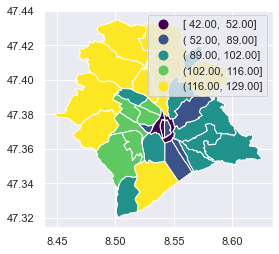

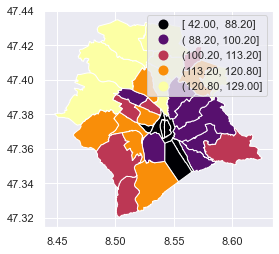

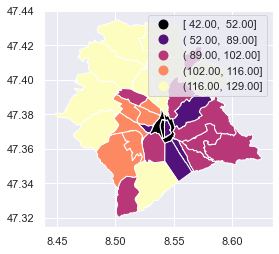

In [73]:
# Plot by StatZonen

stadtquartiere_shapes_joined.plot(column='AnzNat', cmap='viridis', scheme='natural_breaks', legend=True )
#scheme werte: https://matplotlib.org/2.0.2/users/colormaps.html

stadtquartiere_shapes_joined.plot(column='AnzNat', cmap='inferno', scheme='quantiles', legend=True )
#scheme werte: https://matplotlib.org/2.0.2/users/colormaps.html
stadtquartiere_shapes_joined.plot(column='AnzNat', cmap='magma', scheme='fisherjenks', legend=True )
#scheme werte: https://matplotlib.org/2.0.2/users/colormaps.html

Noch zu prüfen, folgendes schöne Beispiel: https://docs.bokeh.org/en/latest/docs/user_guide/interaction/legends.html

Konkrete Beispiele von Bookeh in Jupyter NB: https://docs.bokeh.org/en/latest/docs/user_guide/jupyter.html

**Sharepoint als gecheckt markieren!**

Record auf Sharepoint: **[Link](http://kollaboration.intranet.stzh.ch/orga/ssz-produkte/Lists/SASA_Outputs/EditForm.aspx?ID=157&Source=%2Forga%2Fssz%2Dprodukte%2FLists%2FSASA%5FOutputs)**